In [3]:
import pandas as pd

test_df = pd.read_csv("../classified_logs_output.csv")

In [4]:
test_df.head()

,timestamp,source,log_message,target_label,complexity,Predicted Label
0,2025-06-27 07:20:25,ModernCRM,nova.osapi_compute.wsgi.server [req-b9718cd8-f...,HTTP Status,bert,HTTP Status
1,1/14/2025 23:07,ModernCRM,Email service experiencing issues with sending,Critical Error,bert,Error
2,1/17/2025 1:29,AnalyticsEngine,Unauthorized access to data was attempted,Security Alert,bert,Security Alert
3,2025-07-12 00:24:16,ModernHR,nova.osapi_compute.wsgi.server [req-4895c258-b...,HTTP Status,bert,HTTP Status
4,2025-06-02 18:25:23,BillingSystem,nova.osapi_compute.wsgi.server [req-ee8bc8ba-9...,HTTP Status,bert,HTTP Status


In [5]:
from sklearn.metrics import classification_report

report = classification_report(test_df['target_label'], test_df['Predicted Label'])
print(report)

                     precision    recall  f1-score   support

     Critical Error       0.99      0.98      0.99       161
Deprecation Warning       0.00      0.00      0.00         3
              Error       0.96      0.99      0.98       177
        HTTP Status       1.00      1.00      1.00      1017
     Resource Usage       1.00      1.00      1.00       177
     Security Alert       0.99      1.00      1.00       371
System Notification       1.00      1.00      1.00       356
        User Action       1.00      1.00      1.00       144
     Workflow Error       0.00      0.00      0.00         4

           accuracy                           1.00      2410
          macro avg       0.77      0.78      0.77      2410
       weighted avg       0.99      1.00      0.99      2410



c:\Users\tamma\Development\Hybrid_log_classification_system\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\tamma\Development\Hybrid_log_classification_system\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\tamma\Development\Hybrid_log_classification_system\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to contr

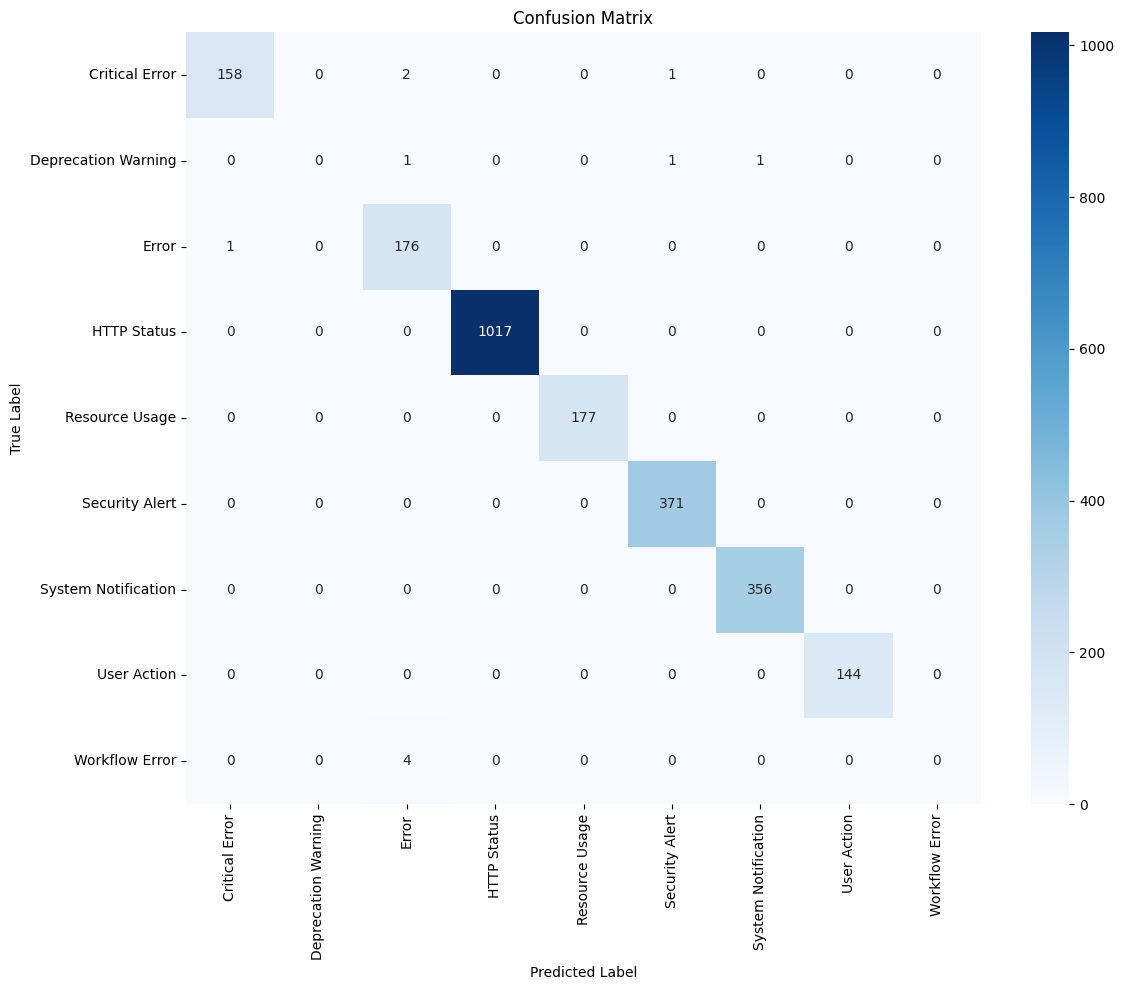

In [6]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

import matplotlib.pyplot as plt

# Create confusion matrix
cm = confusion_matrix(test_df['target_label'], test_df['Predicted Label'])

# Plot confusion matrix
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=sorted(test_df['target_label'].unique()),
            yticklabels=sorted(test_df['target_label'].unique()))
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()